# Problem Set 2: Cumulant Generating Function, Change of Variables, Monte Carlo, Poisson Distribution, Trinomial Distribution

## Name: Askold Vilkha

In [1]:
%matplotlib inline
# magic command to display plots inline in the notebook - might not be necessary for your environment

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# lines below are for setting the default plot size and font size
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1. Cumulant Generating Function, cont'd

Consider two random variables with a joint Moment Generating Function (MGF):
$$M(t_1,t_2)=E\left( e^{t_1{\color{royalblue}{X_1}}+t_2\color{royalblue}{X_2}}\right),$$ 
which can be used to find
$$E\left({\color{royalblue}{X_1}}^{k_1}{\color{royalblue}{X_2}}^{k_2}\right)
  = \left.
    \frac{\partial^{k_1+k_2}}{\partial^{k_1}t_1\partial^{k_2}t_2}
    M(t_1,t_2)
  \right\rvert_{(t_1,t_2)=(0,0)}$$

Define $\psi(t_1,t_2)=\ln M(t_1,t_2)$
and show that the covariance of $\color{royalblue}{X_1}$ and $\color{royalblue}{X_2}$ can be evaluated as
$$\operatorname{Cov}({\color{royalblue}{X_1}},{\color{royalblue}{X_2}}) = \left.
   \frac{\partial^2\psi}{\partial t_1\,\partial t_2}
  \right\rvert_{(t_1,t_2)=(0,0)}$$

To prove this formula of covariance we need to show that we can obtain the original form of covariance from it. Originally, covariance is defined as: 
$$ \operatorname{Cov}(X_1, X_2)= 
E\left[{(X_1-\mu_{x_1})(X_2-\mu_{x_2})}\right] =
E\left[{X_1 X_2}\right]-\mu_{x_1}\mu_{x_2}$$

Considering $\psi(t_1, t_2)=\ln M(t_1, t_2)$ let's take the partial derivative from the above formula:
$$\left. \frac{\partial^2\psi}{\partial t_1\partial t_2} \right\rvert_{(t_1,t_2)=(0,0)} = \left. \frac{\partial}{\partial t_1}\left(\frac{\partial \psi}{\partial t_2}\right) \right\rvert_{(t_1,t_2)=(0,0)}$$
First, let's take the derivative by $t_2$: 
$$\left. \frac{\partial \psi}{\partial t_2} \right\rvert_{(t_1,t_2)=(0,0)}=
\left. \frac{1}{M(t_1,t_2)}\frac{\partial M(t_1, t_2)}{\partial t_2} \right\rvert_{(t_1,t_2)=(0,0)} $$
Let's continue with derivative by $t_1$:
$$\left. \frac{\partial}{\partial t_1} \left(\frac{1}{M(t_1,t_2)}\frac{\partial M(t_1, t_2)}{\partial t_2}\right) \right\rvert_{(t_1,t_2)=(0,0)}=
\left. -\frac{1}{M^2(t_1, t_2)}\frac{\partial M(t_1, t_2)}{\partial t_1} \frac{\partial M(t_1, t_2)}{\partial t_2} \right\rvert_{(t_1,t_2)=(0,0)}+
\left. \frac{1}{M(t_1, t_2)}\frac{\partial^2 M(t_1, t_2)}{\partial t_1 \partial t_2} \right\rvert_{(t_1, t_2)=(0,0)}$$

It can be easily shown that $M(0,0)=1$:
$$M(0,0)=E(e^{0*X_1+0*X_2})=E(1)=1$$
Also, from the above formula for obtaining $E(X_1^{k_1}X_2^{k_2})$ we can easily get other derivatives:
$$\left. \frac{\partial M(t_1, t_2)}{\partial t_1} \right\rvert_{(t_1, t_2)=(0,0)}=E(X_1^1 X_2^0)=E\left[X_1\right]=\mu_{x_1}$$
$$\left. \frac{\partial M(t_1, t_2)}{\partial t_2} \right\rvert_{(t_1, t_2)=(0,0)}=E(X_1^0 X_2^1)=E\left[X_2\right]=\mu_{x_2}$$
$$\left. \frac{\partial^2 M(t_1, t_2)}{\partial t_1 \partial t_2} \right\rvert_{(t_1, t_2)=(0,0)}=E(X_1^1 X_2^1)=E\left[X_1 X_2\right]$$
Thus, as the final expression we obtain:
$$\left. \frac{\partial^2 \psi}{\partial t_1 \partial t_2} \right\rvert_{(t_1, t_2)=(0,0)}=
E\left[X_1 X_2\right]-\mu_{x_1} \mu_{x_2}=\operatorname{Cov} (X_1, X_2)$$

## 2. Change of Variables

Define traditional spherical coordinates $(\theta,\phi)$, with $\theta$ being the
angle down from the zenith (so that $\theta=0$ is the zenith and
$\theta=\pi/2$ is the horizon) and $\phi$ being an azimuthal angle which
runs from $0$ to $2\pi$. Consider an event which occurs at a random sky
location above the horizon. The joint pdf for the random variables
$\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$ is $$
  f_{\Theta\Phi}(\theta,\phi)
  = \frac{\sin\theta}{2\pi} \qquad 0\le\theta\le\pi/2;
  \ 0\le\phi<2\pi$$

**a)** Integrate over $\theta$ and $\phi$ to confirm that
$f_{\Theta\Phi}(\theta,\phi)$ is a normalized density in those
variables.

This is a function of two coordinates ($\theta , \phi$). So we need to integrate over both simultaneously. Let's do it: 
$$ \int_0^{2\pi} d \phi \int_0^{\pi /2} \frac{\sin \theta}{2\pi} d\theta=
\frac{1}{2\pi} \int_0^{2\pi} d \phi \int_0^{\pi /2} \sin \theta d\theta=
\frac{1}{2\pi} \int_0^{2\pi} d \phi \times \left(\left. \cos \theta \right\rvert_{\pi/2}^0\right)=
\frac{1}{2\pi} \int_0^{2\pi} d \phi \times (1-0)=\frac{1}{2\pi} \int_0^{2\pi} d \phi=\frac{1}{2\pi} 2\pi=1$$
Thus we can prove that $f_{\Theta \Phi} (\theta, \phi)$ is a normalized density, since it's overall integral equals to 1.\
(After integrating over $\theta$, we swapped the limits of the integral since the integral of $\sin\theta$ is $-\cos\theta$)

**b)** Explain if $f_{\Theta\Phi}(\theta,\phi)$ represents an isotropic probability distribution.

Let's start with a logical argument and work out mathematically correct proof afterward. This function hasn't any arguments related to $\phi$, which stands for the azimuth, which represents the direction. To be isotropic, the probability distribution function has to be the same for different directions. It is true for this function, since it doesn't change for different values of $\phi$ - azimuthal angle; it depends only on $\theta$, which stands for the angle down from zenith.

In spherical coordinates, this probability distribution function would be isotropic if it doesn't depend on $\phi$. Let's prove it mathematically. To do so, we need to show that the probability distribution function doesn't change under the transformation of $\phi$. Let's consider the transformation of $\phi$ to $\phi + \Delta \phi$. The probability distribution function should remain the same under this transformation. Let's check it:
$$f_{\Theta \Phi} (\theta, \phi + \Delta \phi)=\frac{\sin \theta}{2\pi}$$
$$f_{\Theta \Phi} (\theta, \phi)=\frac{\sin \theta}{2\pi}$$
Thus, we can see that the probability distribution function doesn't change under the transformation of $\phi$, which means that it is isotropic. We can also see that the probability density per solid angle is constant, which is a characteristic of isotropic distribution.
$$ \frac{ d^2 P}{d^2 \Omega} = \text{const}$$
Here $d^2 \Omega = \sin \theta d \theta d \phi$ is the solid angle element.
Thus:
$$ \frac{ d^2 P}{d^2 \Omega} = \frac{1}{\sin \theta} \frac{d^2 P}{d \theta d \phi} = \frac{1}{\sin \theta} \frac{1}{2\pi} \sin \theta = \frac{1}{2\pi}$$
Hence, our probability distribution function is isotropic in spherical coordinates.

This argument might be sufficient for our case, when we have physical meaning of the variables. However, in general, we should check the isotropy using covariance matrix. In statistics, the distribution is isotropic if its covariance matrix is a multiple of the identity matrix. In other words, the covariance matrix is a diagonal matrix with the same value on the diagonal. The covariance matrix for the random variables $\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$ is given by: 

$$\Sigma = \begin{bmatrix}
  \operatorname{Var}({\color{royalblue}{\Theta}}) & \operatorname{Cov}({\color{royalblue}{\Theta}},{\color{royalblue}{\Phi}}) \\
  \operatorname{Cov}({\color{royalblue}{\Theta}},{\color{royalblue}{\Phi}}) & \operatorname{Var}({\color{royalblue}{\Phi}})
\end{bmatrix}$$

To compute the covariance matrix, we need to find the variance and covariance of the random variables $\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$. 
The covariance of two random variables is defined as:
$$\operatorname{Cov}(X, Y)=E\left[(X-\mu_x)(Y-\mu_y)\right]=E(XY)-\mu_x \mu_y$$
Let's calculate the covariance of $\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$:
$$\operatorname{Cov}({\color{royalblue}{\Theta}}, {\color{royalblue}{\Phi}})=E({\color{royalblue}{\Theta}} {\color{royalblue}{\Phi}})-\mu_{\theta} \mu_{\phi}$$
To calculate the expected value of $\color{royalblue}{\Theta} \color{royalblue}{\Phi}$, we need to integrate the product of the joint pdf and the product of the random variables:
$$E({\color{royalblue}{\Theta}} {\color{royalblue}{\Phi}})=\int_0^{2\pi} d \phi \int_0^{\pi /2} \frac{\sin \theta}{2\pi} \theta \phi d\theta = 
\frac{1}{2\pi} \int_0^{2\pi} \phi d \phi \int_0^{\pi /2} \theta \sin \theta d\theta$$
Let's calculate the integrals separately:
$$\int_0^{2\pi} \phi d \phi = \left. \frac{\phi^2}{2} \right\rvert_0^{2\pi}= 2\pi^2$$
$$\int_0^{\pi /2} \theta \sin \theta d\theta = \left. -\theta \cos \theta \right\rvert_0^{\pi /2}+\int_0^{\pi /2} \cos \theta d\theta = 0+\left. \sin \theta \right\rvert_0^{\pi /2}=1$$
Thus, the expected value of $\color{royalblue}{\Theta} \color{royalblue}{\Phi}$ is:
$$E({\color{royalblue}{\Theta}} {\color{royalblue}{\Phi}})=\frac{1}{2\pi} \times 2\pi^2=\pi$$
The expected values of $\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$ can be calculated as:
$$\mu_{\theta}=E({\color{royalblue}{\Theta}})=\int_0^{2\pi} d \phi \int_0^{\pi /2} \frac{\sin \theta}{2\pi} \theta d\theta =
\frac{1}{2\pi} \int_0^{2\pi}  d \phi \int_0^{\pi /2} \theta \sin \theta d\theta = \frac{1}{2\pi} \times 2\pi= 1$$
$$\mu_{\phi}=E({\color{royalblue}{\Phi}})=\int_0^{2\pi} \phi d \phi \int_0^{\pi /2} \frac{\sin \theta}{2\pi} \phi d\theta = 
\frac{1}{2\pi} \int_0^{2\pi} \phi d \phi = \frac{1}{2\pi} \left. \frac{\phi^2}{2} \right\rvert_0^{2\pi}= \pi$$
Thus, the covariance of $\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$ is:
$$\operatorname{Cov}({\color{royalblue}{\Theta}}, {\color{royalblue}{\Phi}})=\pi - \pi = 0$$

Variances of the random variables can be calculated as:
$$\operatorname{Var}({\color{royalblue}{\Theta}})=E({\color{royalblue}{\Theta}}^2)-\mu_{\theta}^2$$
$$\operatorname{Var}({\color{royalblue}{\Phi}})=E({\color{royalblue}{\Phi}}^2)-\mu_{\phi}^2$$
Let's calculate the expected values of $\color{royalblue}{\Theta}^2$ and $\color{royalblue}{\Phi}^2$:
$$E({\color{royalblue}{\Theta}}^2)=\int_0^{2\pi} d \phi \int_0^{\pi /2} \frac{\sin \theta}{2\pi} \theta^2 d\theta =
\frac{1}{2\pi} \int_0^{2\pi}  d \phi \int_0^{\pi /2} \theta^2 \sin \theta d\theta = \int_0^{\pi /2} \theta^2 \sin \theta d\theta = $$
$$\left. -\theta^2 \cos \theta \right\rvert_0^{\pi /2}+\int_0^{\pi /2} 2\theta \cos \theta d\theta = 0+2\int_0^{\pi /2} \theta \cos \theta d\theta$$
$$2 \int_0^{\pi /2} \theta \cos \theta d\theta = \left. 2 \theta \sin \theta \right\rvert_0^{\pi /2}- 2\int_0^{\pi /2} \sin \theta d\theta = \pi - 1$$
$$E({\color{royalblue}{\Phi}}^2)=\int_0^{2\pi} \phi^2 d \phi \int_0^{\pi /2} \frac{\sin \theta}{2\pi} d\theta =
\frac{1}{2\pi} \int_0^{2\pi} \phi^2 d \phi = \frac{1}{2\pi} \left. \frac{\phi^3}{3} \right\rvert_0^{2\pi}= \frac{4\pi^2}{3}$$
Thus, the variances of the random variables are:
$$\operatorname{Var}({\color{royalblue}{\Theta}})=\pi - 1 - 1 = \pi - 2$$
$$\operatorname{Var}({\color{royalblue}{\Phi}})=\frac{4\pi^2}{3} - \pi^2 = \frac{\pi^2}{3}$$
Hence, the covariance matrix is:
$$\Sigma = \begin{bmatrix}
  \pi - 2 & 0 \\
  0 & \frac{\pi^2}{3}
\end{bmatrix}$$
The covariance matrix is not a multiple of the identity matrix, so the distribution is not isotropic, even though the covariance of $\color{royalblue}{\Theta}$ and $\color{royalblue}{\Phi}$ is zero.

**c)** Define new random variables
$$\begin{aligned}
      \color{royalblue}{N_x} &= \sin{\Theta}\cos{\Phi} \\
      \color{royalblue}{N_y} &= \sin{\Theta}\sin{\Phi}
    \end{aligned}$$
which are the projections onto two horizontal directions of the unit vector
pointing to the event. Perform a change of variables to obtain the joint
pdf $f_{N_xN_y}(n_x,n_y)$ for those two variables. (Your answer should
not contain $\theta$ or $\phi$, although they may be convenient for
intermediate steps.)

What is the region of the $(n_x,n_y)$ plane which corresponds to
$0\le\theta\le\pi/2$, $0\le\phi<2\pi$?

First of all let's find the Jacobian matrix, and calculate it's determinant. The easiest is to operate with this matrix:
$$ \frac{\partial(n_x, n_y)}{\partial(\theta, \phi)}=
\begin{pmatrix}
    \frac{\partial n_x}{\partial \theta}& \frac{\partial n_x}{\partial \phi}\\
    \frac{\partial n_y}{\partial \theta}& \frac{\partial n_y}{\partial \phi}
    \end{pmatrix}$$

Let's take the derivatives:
$$ \frac{\partial n_x}{\partial \theta}=\frac{\partial (\sin\theta\cos\phi)}{\partial\theta}=\cos\theta\cos\phi \\
\frac{\partial n_x}{\partial \phi}=\frac{\partial (\sin\theta\cos\phi)}{\partial\phi}=-\sin\theta\sin\phi \\
\frac{\partial n_y}{\partial \theta}=\frac{\partial (\sin\theta\sin\phi)}{\partial\theta}=\cos\theta\sin\phi \\
\frac{\partial n_y}{\partial \phi}=\frac{\partial (\sin\theta\sin\phi)}{\partial\phi}=\sin\theta\cos\phi$$

Now let's find the determinant of the matrix:
$$ \left\lvert\det\frac{\partial(n_x, n_y)}{\partial(\theta, \phi)}\right\rvert= \cos\theta\cos\phi\sin\theta\cos\phi+\sin\theta\sin\phi\cos\theta\sin\phi= \\
=\cos^2\phi\sin\theta\cos\theta+\sin^2\phi\sin\theta\cos\theta=(\cos^2\phi+\sin^2\phi)\sin\theta\cos\theta=\\=
\sin\theta\cos\theta$$

To obtain the pdf with new variables, we need to go through these steps:
$$ f_{N_x N_y} (n_x, n_y)= \left\lvert\det\frac{\partial (\theta, \phi)}{\partial(n_x, n_y)}\right\rvert 
f_{\Theta\Phi}(\theta (n_x, n_y), \phi(n_x, n_y)) $$
Where we can derive the determinant of Jacobian matrix: 
$$\left\lvert\det\frac{\partial (\theta, \phi)}{\partial(n_x, n_y)}\right\rvert=
1/\left\lvert\det\frac{\partial(n_x, n_y)}{\partial (\theta, \phi)}\right\rvert=1/\sin\theta\cos\theta $$
So, the function in new variables could be defined in the following way:
$$ f_{N_x N_y} (n_x, n_y)=\frac{1}{\sin\theta\cos\theta}f_{\Theta\Phi}(\theta, \phi)=
\frac{1}{\sin\theta\cos\theta}\frac{\sin\theta}{2\pi}=\frac{1}{2\pi\cos\theta}$$

Finally, we need to define $\cos\theta$ in terms of $n_x$ and $n_y$. It is not hard to do mathematically:
$$n_x^2+n_y^2=\sin^2\theta\cos^2\phi+\sin^2\theta\sin^2\phi=\sin^2\theta(\cos^2\phi+\sin^2\phi)=\sin^2\theta$$
Therefore: 
$$\cos^2\theta=1-\sin^2\theta=1-n_x^2-n_y^2\\
\cos\theta=\sqrt{1-n_x^2-n_y^2}$$
So, our function will look this way:
$$ f_{N_x N_y}(n_x, n_y)=\frac{1}{2\pi\sqrt{1-n_x^2-n_y^2}}$$

To define the region of the $(n_x, n_y)$ plane, which corresponds to given coordinates $(\theta, \phi)$ we need to understand the meaning of the $n_x$ and $n_y$ coordinates. They represent projections of the unit vector, pointing on the point on the sphere. Limits of the $(\theta, \phi)$ coordinates confine the position of the possible points to hemisphere. Thus, the projections must lay **in the circle** which cuts the sphere by half. Also, from the $\cos\theta$ formula above, we can conclude that $n_x^2+n_y^2$ must be less or equal than 1. If we plot it on the $(n_x, n_y)$ plane, we get the area of the circle. Also, if we put the limits for $\theta$ and $\phi$ in the formulas for $N_x$ and $N_y$, we will see that the lowest point for both would be -1, and the highest 1.\
Therefore, our region is **in the circle of radius 1, including the actual circle**. Our limits are: 
$$\sqrt{n_x^2+n_y^2}\leq 1$$
$$-\sqrt{1 - n_y^2}\leq n_x\leq \sqrt{1 - n_y^2}$$

**d)** Marginalize over $n_y$ to find $f_{N_x}(n_x)$.

Marginalizing over $n_y$ means taking the integral over $dn_y$, so we can find $f_{N_x}(n_x)$. Therefore: 
$$ f_{N_x}(n_x)=\int_{-\sqrt{1-n_x^2}}^{\sqrt{1-n_x^2}} \frac{dn_y}{2\pi\sqrt{1-n_x^2-n_y^2}}=\frac{1}{2\pi}\int_{-\sqrt{1-n_x^2}}^{\sqrt{1-n_x^2}}\frac{dn_y}{\sqrt{1-n_x^2-n_y^2}}$$
(The limits of the integral here are derived from the circle equation which in fact defines the boundaries of the area: $n_x^2+n_y^2=1$)\
Here we are going to make substitution:
$$ a^2=1-n_x^2; u=n_y$$
$$ f_{N_x}(n_x)=\frac{1}{2\pi}\int_{-a}^a\frac{du}{\sqrt{a^2-u^2}}=
\frac{1}{2\pi}\int_{-1}^1\frac{d(\frac{u}{a})}{\sqrt{1-(\frac{u}{a})^2}}$$
This is the perfect place to make trigonometrical substitution:
$$\frac{u}{a}=\sin\alpha\\
\int_{-1}^1\frac{d\sin\alpha}{\sqrt{1-\sin^2\alpha}}=\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}\frac{\cos\alpha d\alpha}{\cos\alpha}=\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}d\alpha=\frac{\pi}{2}+\frac{\pi}{2}=\pi$$
Therefore:
$f_{N_x}(n_x)=\frac{\pi}{2\pi}=\frac{1}{2}$

## 3. Monte Carlo

We can also use Monte Carlo methods to simulate multivariate distributions.  Consider the distribution
$$f(x,y)
  =
  \begin{cases}
    \frac{4}{\pi} e^{-x^2-y^2} & 0<x<\infty;\ 0<y<\infty
    \\
    0
    & \hbox{otherwise}
  \end{cases}$$
Since this can be written as $f(x,y)=f(x)f(y)$, where
$$
f(x) =
  \begin{cases}
    \frac{2}{\sqrt{\pi}} e^{-x^2} & 0<x<\infty
    \\
    0
    & \hbox{otherwise}
  \end{cases}$$

and
$$
f(y) =
  \begin{cases}
    \frac{2}{\sqrt{\pi}} e^{-y^2} & 0<y<\infty
    \\
    0
    & \hbox{otherwise}
  \end{cases}$$
are normalized probability distributions, we say that $\color{royalblue}{X}$ and $\color{royalblue}{Y}$ are *independent* random variables, whose joint pdf $f(x,y)$ is completely determined by the marginal pdfs $f(x)$ and $f(y)$.  We can thus simulate them separately:

In [3]:
np.random.seed(20220830)
Nmonte = 10**5
X_I = np.abs(stats.norm(scale = np.sqrt(0.5)).rvs(size = Nmonte))
Y_I = np.abs(stats.norm(scale = np.sqrt(0.5)).rvs(size = Nmonte))

**a)** Plot normalized histograms of the Monte Carlo ensembles for $\color{royalblue}{X}$ and $\color{royalblue}{Y}$, and overplot each with the marginal pdf $f(x)$ or $f(y)$ above to verify that the Monte Carlo ensembles represent the appropriate probability distribution.

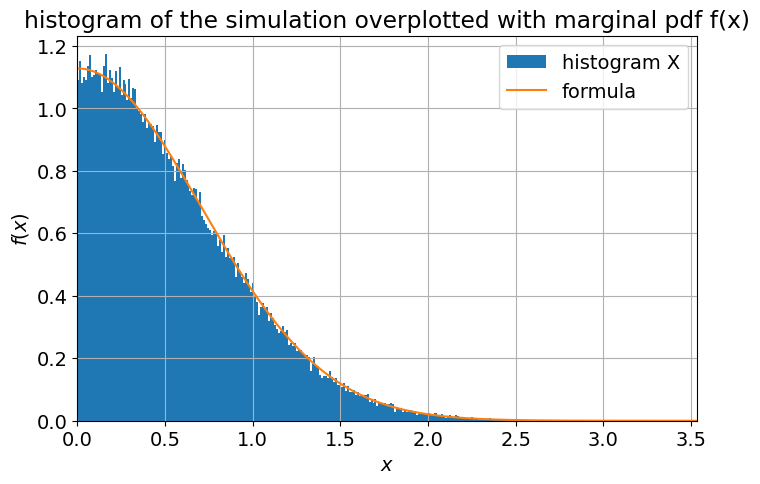

In [4]:
sigma = np.sqrt(0.5)
xmin = 0; xmax = 0 + 5 * sigma
x_x = np.linspace(xmin, xmax, int(np.sqrt(Nmonte)))
formula_x = 2 / np.sqrt(np.pi) * np.exp((-1) * x_x**2)
plt.hist(X_I, bins = x_x, density = True, label = 'histogram X')
plt.plot(x_x, formula_x, label = 'formula')
plt.xlim(xmin, xmax); plt.grid(True); plt.legend();
plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$'); plt.title(r'histogram of the simulation overplotted with marginal pdf f(x)');

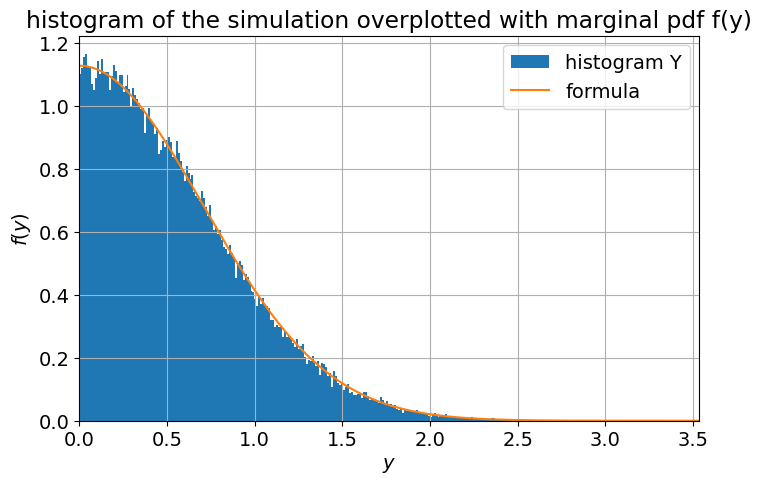

In [5]:
ymin = 0; ymax = 0 + 5 * sigma
y_y = np.linspace(ymin, ymax, int(np.sqrt(Nmonte)))
formula_y = 2 / np.sqrt(np.pi) * np.exp((-1) * y_y**2)
plt.hist(Y_I, bins = y_y, density = True, label = 'histogram Y')
plt.plot(y_y, formula_y, label = 'formula')
plt.xlim(ymin, ymax); plt.grid(True); plt.legend();
plt.xlabel(r'$y$'); plt.ylabel(r'$f(y)$'); plt.title(r'histogram of the simulation overplotted with marginal pdf f(y)');

As we can see, the pdf and simulation coincide well.

Incidentally, you can scatter plot the points in the ensemble to get a picture of the joint probability distribution:

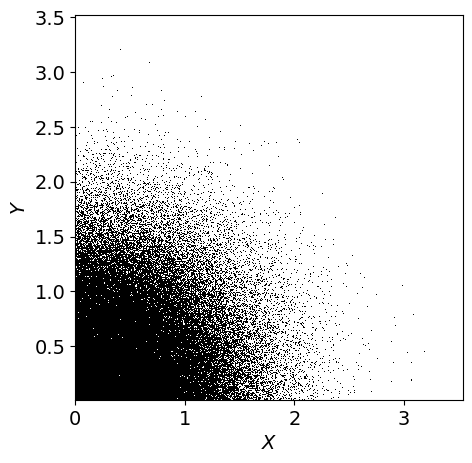

In [6]:
plt.figure().set_size_inches(5,5)
plt.plot(X_I, Y_I ,'k,');
plt.axis('equal');
plt.xlabel(r'$X$');
plt.ylabel(r'$Y$');
plt.xlim(xmin, xmax);
plt.ylim(ymin, ymax);

Or plot a two-dimensional histogram:

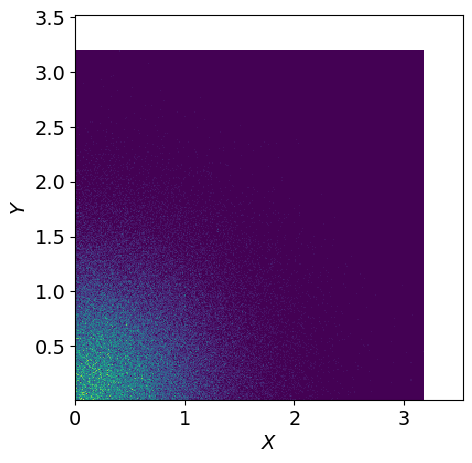

In [7]:
plt.figure().set_size_inches(5,5)
plt.hist2d(X_I, Y_I, bins = int(np.sqrt(Nmonte)));
plt.axis('equal');
plt.xlabel(r'$X$');
plt.ylabel(r'$Y$');
plt.xlim(xmin, xmax);
plt.ylim(ymin, ymax);

**b)** Use the Monte Carlo ensemble to estimate the covariance $\operatorname{Cov}({\color{royalblue}{X}},{\color{royalblue}{Y}})$.  (Since $\color{royalblue}{X}$ and $\color{royalblue}{Y}$ are independent random variables, the exact value of their covariance is zero.)

Covariance is defined by the next formula:
$$ \operatorname{Cov}(X, Y)=E\left[{XY}\right]-\mu_y\mu_y$$
The easiest way to estimate expectation value is to get the actual average of the array. Therefore, we will multiply Monte Carlo simulations for $X$ and $Y$ and take the average. Also, we will get the averages for single $X$ and $Y$ simulations. After, we will subtract their product of the average of the product of $X$ and $Y$. 

In [8]:
X_Y_I = X_I * Y_I
xy_exp = np.mean(X_Y_I)
x_exp = np.mean(X_I)
y_exp = np.mean(Y_I)

In [9]:
print(xy_exp - x_exp * y_exp)

0.00011160644426144728


We can use built-in numpy function `np.cov` to calculate the covariance matrix. It will return the covariance matrix, and we need to take the element in the first row and the second column or in the second row and the first column

In [10]:
np.cov(X_I, Y_I)

array([[1.81731071e-01, 1.11607560e-04],
       [1.11607560e-04, 1.81245050e-01]])

As we can see, the covariance estimated by Monte Carlo simulation is almost zero. Since we don't expect to get exactly zero from float numbers, that result should be considered as zero, which is actually true for our situation.

**c)** Transform to random variables $\color{royalblue}{R}=\sqrt{\color{royalblue}{X}^2+\color{royalblue}{Y}^2}$ and $\color{royalblue}{\Phi}=\mathop{\mathrm{\texttt{atan2}}}(\color{royalblue}{Y},\color{royalblue}{X})$ to produce ensembles `R_I` and `Phi_I`.

Note: to invert the transformation $x=r\cos\phi$, $y=r\sin\phi$,
for a general point in the $(x,y)$ plane,
    one needs to use the function
    $$\mathop{\mathrm{\texttt{atan2}}}(y,x) =
        \begin{cases}
          \tan^{-1}(y/x) - \pi & x < 0 \hbox{ and } y < 0 \\
          -\pi/2 & x = 0 \hbox{ and } y < 0 \\
          \tan^{-1}(y/x) & x > 0 \\
          \pi/2 & x = 0 \hbox{ and } y > 0 \\
          \tan^{-1}(y/x) + \pi & x < 0 \hbox{ and } y \ge 0
        \end{cases}$$
which is implemented in numpy as `np.arctan2(y,x)`.
$\phi=\mathop{\mathrm{\texttt{atan2}}}(y,x)$ always gives the
    get the correct $\phi\in[-\pi,\pi)$, while $\tan^{-1}(y/x)$ will only give the correct angle for $x>0$.  (Since the distribution in this problem only has support for $x>0$, the distinction won't matter here, but it's good to keep in mind.)

Produce a scatter plot and a two-dimensional histogram of the `R_I` and `Phi_I` values.  

In [11]:
R_I = np.sqrt(X_I**2 + Y_I**2)
Phi_I = np.arctan2(Y_I, X_I)

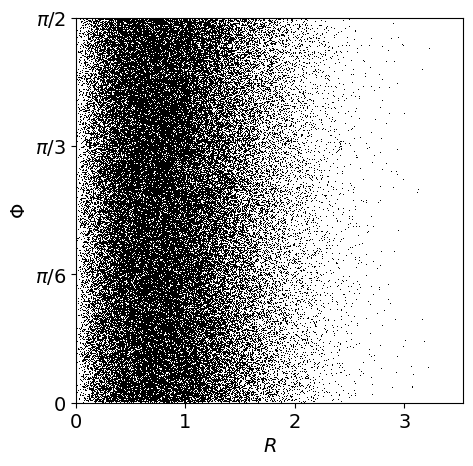

In [12]:
plt.figure().set_size_inches(5,5)
plt.plot(R_I, Phi_I, 'k,');
plt.yticks(np.arange(4) * np.pi / 6, [r'$0$', r'$\pi/6$', r'$\pi/3$', r'$\pi/2$'])
plt.xlabel(r'$R$');
plt.ylabel(r'$\Phi$');
plt.xlim(0, 5 * sigma);
plt.ylim(0, np.pi / 2);

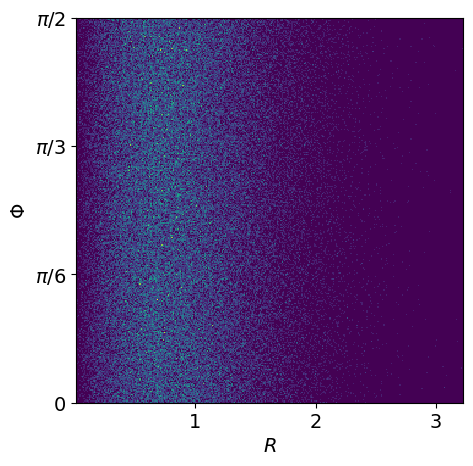

In [13]:
plt.figure().set_size_inches(5,5)
plt.hist2d(R_I, Phi_I, bins = int(np.sqrt(Nmonte)));
plt.yticks(np.arange(4) * np.pi / 6, [r'$0$', r'$\pi/6$', r'$\pi/3$', r'$\pi/2$'])
plt.xlabel(r'$R$');
plt.ylabel(r'$\Phi$');

**d)** We know that
$$f(r,\phi)
  =
  \begin{cases}
    \frac{4}{\pi}\,r\,e^{-r^2} & 0<r<\infty;\ 0<\phi<\pi/2 \\
    0 & \hbox{otherwise}
  \end{cases}$$
which can also be factored into $f(r,\phi)=f(r)f(\phi)$ where
$$f(r)
  =
  \begin{cases}
    2r\,e^{-r^2} & 0<r<\infty \\
    0 & \hbox{otherwise}
  \end{cases}$$
and
$$f(\phi)
  =
  \begin{cases}
    \frac{2}{\pi} & 0<\phi<\pi/2 \\
    0 & \hbox{otherwise}
  \end{cases}$$
so $\color{royalblue}{R}$ and $\color{royalblue}{\Phi}$ are also independent random variables.
Use the Monte Carlo ensembles `R_I` and `Phi_I` to estimate $\mathop{Cov}({\color{royalblue}{R}}, {\color{royalblue}{\Phi}})$

We will do it in the same way as for $X$ and $Y$ above. 

In [14]:
R_Phi_I = R_I * Phi_I
r_phi_exp = np.mean(R_Phi_I)
r_exp = np.mean(R_I)
phi_exp = np.mean(Phi_I)
print(r_phi_exp - r_exp * phi_exp)

-0.00015185329308131656


Or with `np.cov` function.

In [15]:
np.cov(R_I, Phi_I)

array([[ 2.15002872e-01, -1.51854812e-04],
       [-1.51854812e-04,  2.04970555e-01]])

The result is almost zero, which we can consider zero, as well as for $X$ and $Y$

**e)** Plot normalized (one-dimensional) histograms of the Monte Carlo ensembles for $\color{royalblue}{R}$ and $\color{royalblue}{\Phi}$, and overplot each with the marginal pdf $f(r)$ or $f(\phi)$ above to verify that the Monte Carlo ensembles represent the appropriate probability distribution.

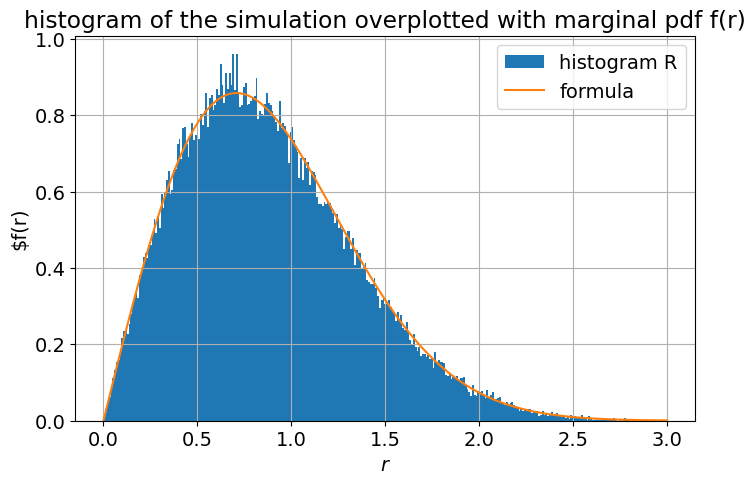

In [16]:
r_r = np.linspace(0, 3, int(np.sqrt(Nmonte)))
formula_r = 2 * r_r * np.exp((-1) * r_r**2)
plt.hist(R_I, bins = r_r, density = True, label = 'histogram R')
plt.plot(r_r, formula_r, label = 'formula')
plt.grid(True); plt.legend();
plt.xlabel(r'$r$'); plt.ylabel(r'$f(r)'); plt.title(r'histogram of the simulation overplotted with marginal pdf f(r)');

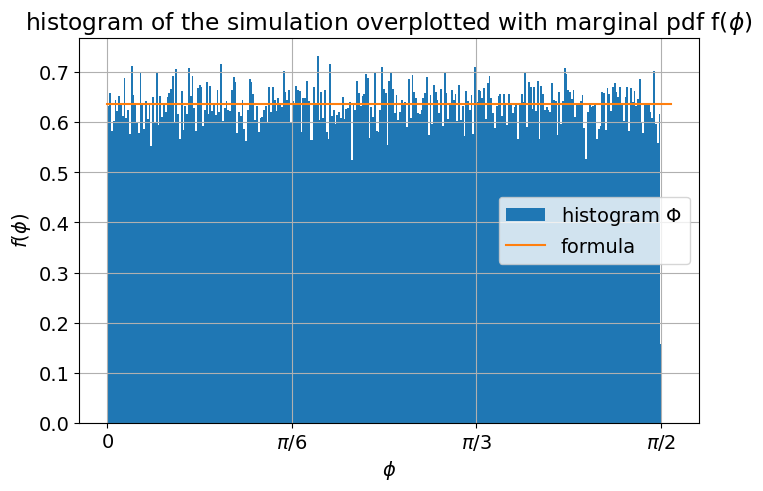

In [17]:
phi_phi = np.linspace(0, 1.6, int(np.sqrt(Nmonte)))
formula_phi = 2 / np.pi * (1 + 0 * phi_phi)
plt.hist(Phi_I, bins = phi_phi, density = True, label = 'histogram $\Phi$')
plt.plot(phi_phi, formula_phi, label = 'formula')
plt.xticks(np.arange(4) * np.pi / 6,[r'$0$', r'$\pi/6$', r'$\pi/3$', r'$\pi/2$'])
plt.grid(True); plt.legend();
plt.xlabel(r'$\phi$'); plt.ylabel(r'$f(\phi)$'); plt.title(r'histogram of the simulation overplotted with marginal pdf f($\phi$)');

## 4. Poisson Distribution

Consider a Poisson process with rate $r$. Let $k_1$ be the number of
events occurring between $t=0$ and $t=T_1$ and $k_2$ be the number of
events occurring between $t=0$ and $t=T_2$, where $0<T_1<T_2$.

**a)** Use the Poisson distribution to find the following probability mass
functions (where $I$ is the background information involved in setting
up the problem but does *not* include the specification of the values of
$r$, $k_1$ or $k_2$):

**i)** The pmf $p(k_1|r,I)$ for the number of events between $t=0$ and $t=T_1$.
For which values of $k_1$ is it non-zero?

From the definition of Poisson distribution, the pmf will be:
$$ p(k_1|r)=\frac{(rT_1)^{k_1}}{(k_1)!} e^{-rT_1}$$
If we use the Poisson distribution, we assume constant rate r, which doesn't depend on the time interval.\
This pmf would not be equal to zero for any integer value of $k_1 \geq 0$, however if $k_1$ differs from $rT_1$, then the pmf will be very small and almost zero. So, at that point we can approximately consider it zero. 
For better understanding of Poisson distribution while given the average rate but not the number of events, see:
https://en.wikipedia.org/wiki/Poisson_distribution

**ii)** The pmf $p(k_2|r,I)$ for the number of events between $t=0$ and $t=T_2$.
For which values of $k_2$ is it non-zero?

This pmf will be:
$$ p(k_2|r)=\frac{(rT_2)^{k_2}}{(k_2)!} e^{-rT_2}$$
Similarly to the previous question, pmf won't be equal zero if $k_2 \geq 0$ and is integer, but if $k_2$ is significantly (at least for one value) different from $rT_2$, then it will be very small and can be approximated to zero. 

**iii)** The pmf $p([k_2-k_1]|r,I)$ for the number of events between $t=T_1$ and
$t=T_2$. For which values of $k_2-k_1$ is it non-zero?

This pmf will be:
$$p([k_2-k_1]|r)=\frac{(r(T_2-T_1))^{k_2-k_1}}{(k_2-k_1)!} e^{r(T_1-T_2)}$$
If $k_2 \geq k_1$ and $k_2 - k_1$ is integer, the pmf won't be equal to zero. Also, as for the previous questions, if $k_2-k_1$ is significantly different from $r(T_2-T_1)$, then pmf will be small enough to be approximated to zero. 

**iv)** The conditional pmf $p(k_2|k_1,r,I)$ for the number of events between
$t=0$ and $t=T_2$, given that $k_1$ events occurred between $t=0$ and
$t=T_1$, where $k_1$ is a non-negative integer. For which values of
$k_2$ is it non-zero?

Here we operate with conditional probability of $k_2$ events happening in the interval from $t=0$ to $t=T_2$, given that $k_1$ events happened in the interval from $t=0$ to $t=T_1$. If $k_1$ events occured in the interval from $t=0$ to $t=T_1$, then the respective probability must be equal 1. Probability of $k_2$ events happening in the interval from $t=T_1$ to $t=T_2$ is given by the pmf $p([k_2-k_1]|r,I)$, which we have found in the previous question. It is equialent to the probability of $k_2$ events hapening in the interval from $t=0$ to $t=T_2$, given that $k_1$ events happened in the interval from $t=0$ to $t=T_1$. Therefore, the pmf will be:
$$p(k_2|k_1,r)=p([k_2-k_1]|r)=1
\frac{(r(T_2-T_1))^{k_2-k_1}}{(k_2-k_1)!} e^{r(T_1-T_2)}
$$
The pmf will not be equal to zero for any value of $k_2$, but it will be very small if $k_2$ will be significantly different from $rT_2$ and/or $k_1$ significantly different from $rT_1$. Also, $k_2 \geq k_1 \geq 0$ and must be integer.

**b)** Use Bayes's theorem to find the conditional pmf $p(k_1|k_2,r,I)$ for the
number of events between $t=0$ and $t=T_1$, given that $k_2$ events
occurred between $t=0$ and $t=T_2$, where $k_2$ is a non-negative
integer. Simplify your result as much as possible. For which values of
$k_1$ is it non-zero?

Bayes's theorem for this case will be written in this form:
$$p(k_1|k_2,r)=\frac{p(k_2|k_1,r)p(k_1|r)}{p(k_2|r)}$$
We will use pmfs derived before in this formula:
$$p(k_1|k_2,r)=\frac{\frac{(r(T_2-T_1))^{k_2-k_1}}{(k_2-k_1)!} e^{r(T_1-T_2)}\frac{(rT_1)^{k_1}}{(k_1)!} e^{-rT_1}}
{\frac{(rT_2)^{k_2}}{(k_2)!} e^{-rT_2}}=\frac{k_2!}{k_1!(k_2-k_1)!}\frac{T_1^{k_1}(T_2-T_1)^{k_2-k_1}}{T_2^{k_2}}=\\=
\frac{k_2!}{k_1!(k_2-k_1)!}\frac{T_1^{k_1}(T_2-T_1)^{k_2-k_1}}{T_2^{k_2-k_1}T_2^{k_1}}=
\frac{k_2!}{k_1!(k_2-k_1)!}\left(\frac{T_1}{T_2}\right)^{k_1}\left(1-\frac{T_1}{T_2}\right)^{k_2-k_1}$$
This function will exist and won't be equal to zero, if $k_1 \geq 0$ and $k_1 \leq k_2$. All the values of $k_1$ and $k_2$ must be integer.
$$$$
For reference and better understanding of the Poisson distribution, I recommend seeing Bayesian Logical Data Analysis for the Physical Sciences by Phil Gregory (Chapter 4.7).

**c)** Your result for part b) should have the form of a binomial distribution.
Describe an alternate derivation of the pmf $p(k_1|k_2,r,I)$ using the
properties of a Poisson process which leads directly to the binomial
form.

If given that in time interval from $t=0$ to $t=T_2$, $k_2$ events have occured, and we want to get the probability of $k_1$ of events happening from $t=0$ to $t=T_1$, we get something similar to standard problem with coin. In fact, we have two cases, the event can be in the interval from $t=0$ to $t=T_1$ or in the interval from $t=T_1$ to $t=T_2$. If we have $k_2$ independent events, the probability of the event being in the first time interval will be $\theta=\frac{T_1}{T_2}$. Probability of it being in the second interval is merely $1-\frac{T_1}{T_2}$. So, we have binomial distribution: 
$$\binom{k_2}{k_1} \theta^{k_1}(1-\theta)^{k_2-k_1}$$
Therefore:
$$p(k_1|k_2,r)=\binom{k_2}{k_1} \left(\frac{T_1}{T_2}\right)^{k_1}\left(1-\frac{T_1}{T_2}\right)^{k_2-k_1}=
\frac{k_2!}{k_1!(k_2-k_1)!}\left(\frac{T_1}{T_2}\right)^{k_1}\left(1-\frac{T_1}{T_2}\right)^{k_2-k_1}$$

## 5. Trinomial Distribution (extra credit)

Consider random variables $\color{royalblue}{X_1}$, $\color{royalblue}{X_2}$, and $\color{royalblue}{X_3}$, which
obey a trinomial distribuition $$p(x_1,x_2,x_3) =
  \begin{cases}
    \frac{n!}{x_1!x_2!x_3!} \theta_1^{x_1}
    \theta_2^{x_2} \theta_3^{x_3},
    & x_1=0,1,\ldots,n;\ x_2=0,1,\ldots,n-x_1;\ x_3=n-x_1-x_2;
    \\
    0 & \hbox{otherwise}
  \end{cases}$$ where $\{\theta_l\}$ are non-negative parameters with
$\theta_1+\theta_2+\theta_3=1$.

**a)** Look up the multinonial theorem and use it to show that the
moment-generating function is
$M(t_1,t_2,t_3):=E\left({e^{t_1\color{royalblue}{X_1}+t_2\color{royalblue}{X_2}+t_3\color{royalblue}{X_3}}}\right) =
  (\theta_1\,e^{t_1}+\theta_2\,e^{t_2}+\theta_3\,e^{t_3})^n$

In general, we can get the moment-generating function from the next formula (from Gregory 5.6):
$$M(t_1, t_2, t_3)=E\left[e^{t_1X_1+t_2X_2+t_3X_3}\right]=\sum_{x_1=0}^n \sum_{x_2=0}^{n-x_1} \sum_{x_3=0}^{n-x_1-x_2}
e^{tx_1}e^{tx_2}e^{tx_3}p(x_1, x_2, x_3)=\\=
\sum_{x_1=0}^n \sum_{x_2=0}^{n-x_1} \sum_{x_3=0}^{n-x_1-x_2}e^{tx_1}e^{tx_2}e^{tx_3}\frac{n!}{x_1!x_2!x_3!}
\theta_1^{x_1}\theta_2^{x_2}\theta_3^{x_3}=\sum_{x_1, x_2, x_3}^{n, n-x_1, n-x_1-x_2} \frac{n!}{x_1!x_2!x_3!}\prod_{k=1}^3(\theta_k e^{t_k})^{x_k}$$
The multinomial theorem (https://en.wikipedia.org/wiki/Multinomial_theorem) gives: 
$$ (x_1+x_2+\ldots+x_m)^n=\sum_{k_1+k_2+\ldots+k_m=n; k1, k2, \ldots, k_m\geq0}\binom {n}{k_1, k_2,\ldots, k_m}\prod_{t=1}^m x_t^{k_t} $$
In our case, we have three elements. Also, in the sum notation $x_1+x_2+x_3=n$. If we substitute $\theta_ke^{t_k}$ instead of $x_t$, and $x$ instead of $k$, we can see that:
$$\sum_{x_1, x_2, x_3}^{n, n-x_1, n-x_1-x_2} \frac{n!}{x_1!x_2!x_3!}\prod_{k=1}^3(\theta_k e^{t_k})^{x_k}=
\sum_{x_1+x_2+x_3=n}\binom{n}{x_1, x_2, x_3}\prod_{k=1}^3(\theta_k e^{t_k})^{x_k}=(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^n$$

**b)** Use the mgf to calculate $E({\color{royalblue}{X_1}})$, $\operatorname{Var}({\color{royalblue}{X_1}})$, and
$\operatorname{Cov}({\color{royalblue}{X_1}},{\color{royalblue}{X_2}})$.

From the lecture 2.1, we can use the next formula to find $E(X_1)$:
$$E\left[X_1^{m_1}X_2^{m_2}X_3^{m_3}\right]=\left. \frac{\partial^{m_1+m_2+m_3}}{\partial^{m_1}t_1\partial^{m_2}t_2\partial^{m_3}t_3}M(t_1, t_2, t_3)\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}$$
Thus:
$$E(X_1)=\left. \frac{\partial}{\partial t_1}M(t_1, t_2, t_3)\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=
n\theta_1e^{t_1}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-1}\rvert_{(t_1,t_2,t_3)=(0,0,0)}=
n\theta_1(\theta_1+\theta_2+\theta_3)^{n-1}$$
Considering that $\theta_1+\theta_2+\theta_3=1$, we get:
$$E(X_1)=n\theta_1$$
To find $\operatorname{Var}(X_1)$ we need to use the next formula:
$$\operatorname{Var}(X_1)=E(X_1^2)-\mu_{X_1}^2=E(X_1^2)-E^2(X_1)$$
Let's find $E(X_1^2)$:
$$E(X_1^2)=\left. \frac{\partial^2}{\partial^2 t_1}M(t_1, t_2, t_3)\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=
n\theta_1(e^{t_1}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-1}+(n-1)\theta_1e^{2t_1}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-2})\rvert_{(t_1,t_2,t_3)=(0,0,0)}=\\=
n\theta_1((\theta_1+\theta_2+\theta_3)^{n-1}+(n-1)\theta_1(\theta_1+\theta_2+\theta_3)^{n-2})=n\theta_1(1+(n-1)\theta_1)=
n\theta_1+n^2\theta_1^2-n\theta_1^2$$
Therefore variance equals: 
$$\operatorname{Var}(X_1)=n\theta_1+n^2\theta_1^2-n\theta_1^2-n^2\theta_1^2=n\theta_1(1-\theta_1)$$
Finally, let's find the covarience by the next formula:
$$\operatorname{Cov}(X_1, X_2)=E(X_1X_2)-E(X_1)E(X_2)$$
Here we need to find $E(X_1X_2)$ and $E(X_2)$:
$$E(X_2)=\left. \frac{\partial}{\partial t_2}M(t_1, t_2, t_3)\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=
n\theta_1e^{t_2}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-1}\rvert_{(t_1,t_2,t_3)=(0,0,0)}=
n\theta_2(\theta_1+\theta_2+\theta_3)^{n-1}=n\theta_2\\
E(X_1X_2)=\left. \frac{\partial^2}{\partial t_1 \partial t_2}M(t_1, t_2, t_3)\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=
\left. \frac{\partial}{\partial t_2}n\theta_1e^{t_1}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-1}
\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=\\=n\theta_1e^{t_1}\left. \frac{\partial}{\partial t_2}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-1}\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=n\theta_1e^{t_1}\left. 
(n-1)\theta_2e^{t_2}(\theta_1e^{t_1}+\theta_2e^{t_2}+\theta_3e^{t_3})^{n-2}\right\rvert_{(t_1,t_2,t_3)=(0,0,0)}=\\=
n(n-1)\theta_1\theta_2(\theta_1+\theta_2+\theta_3)^{n-2}=n(n-1)\theta_1\theta_2$$
As we have worked out all that we need for putting in covariance formula, let's finish it:
$$\operatorname{Cov}(X_1X_2)=n(n-1)\theta_1\theta_2-n^2\theta_1\theta_2=n\theta_1\theta_2(n-1-n)=-n\theta_1\theta_2$$